<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_Scrapy_Faces/blob/main/scrapy_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación del proyecto

In [1]:
# instalación de Scrapy
!pip install Scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 13.5 MB/s 
     |████████████████████████████████| 261 kB 25.6 MB/s 
     |████████████████████████████████| 3.1 MB 46.9 MB/s 
     |████████████████████████████████| 4.0 MB 41.5 MB/s 
     |████████████████████████████████| 93 kB 504 kB/s 
     |████████████████████████████████| 57 kB 1.7 MB/s 
     |████████████████████████████████| 74 kB 1.8 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11959 sha256=a000474cb19e3561e9b4d0df532695d17ef161615fe88d9dfa00922b5534e8ac
  Stored in directory: /root/.cache/pip/wheels/dc/b9/4a/948b1176e084b9e3f85e4ffc3d08f817b1fdf0d973bbb94f81
Successfully built PyDispatcher


In [2]:
# creación del proyecto
!scrapy startproject project_faces scrapy

New Scrapy project 'project_faces', using template directory '/usr/local/lib/python3.8/dist-packages/scrapy/templates/project', created in:
    /content/scrapy

You can start your first spider with:
    cd scrapy
    scrapy genspider example example.com


In [3]:
# creación del spider
!cd scrapy/project_faces && scrapy genspider FindFaces https://www.cadizcf.com/

Created spider 'FindFaces' using template 'basic' in module:
  project_faces.spiders.FindFaces


## Edición de path/to/settings.py



In [4]:
%%writefile scrapy/project_faces/settings.py

# Scrapy settings for project_faces project
#
# For simplicity, this file contains only settings considered important or
# commonly used. You can find more settings consulting the documentation:
#
#     https://docs.scrapy.org/en/latest/topics/settings.html
#     https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#     https://docs.scrapy.org/en/latest/topics/spider-middleware.html

BOT_NAME = 'project_faces'

SPIDER_MODULES = ['project_faces.spiders']
NEWSPIDER_MODULE = 'project_faces.spiders'


# Crawl responsibly by identifying yourself (and your website) on the user-agent
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'

# Obey robots.txt rules
ROBOTSTXT_OBEY = False

# Configure maximum concurrent requests performed by Scrapy (default: 16)
#CONCURRENT_REQUESTS = 32

# Configure a delay for requests for the same website (default: 0)
# See https://docs.scrapy.org/en/latest/topics/settings.html#download-delay
# See also autothrottle settings and docs
#DOWNLOAD_DELAY = 3
# The download delay setting will honor only one of:
#CONCURRENT_REQUESTS_PER_DOMAIN = 16
#CONCURRENT_REQUESTS_PER_IP = 16

# Disable cookies (enabled by default)
#COOKIES_ENABLED = False

# Disable Telnet Console (enabled by default)
#TELNETCONSOLE_ENABLED = False

# Override the default request headers:
DEFAULT_REQUEST_HEADERS = {
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Language': 'es',
}

# Enable or disable spider middlewares
# See https://docs.scrapy.org/en/latest/topics/spider-middleware.html
#SPIDER_MIDDLEWARES = {
#    'project_faces.middlewares.ProjectFacesSpiderMiddleware': 543,
#}

# Enable or disable downloader middlewares
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#DOWNLOADER_MIDDLEWARES = {
#    'project_faces.middlewares.ProjectFacesDownloaderMiddleware': 543,
#}

# Enable or disable extensions
# See https://docs.scrapy.org/en/latest/topics/extensions.html
#EXTENSIONS = {
#    'scrapy.extensions.telnet.TelnetConsole': None,
#}

# Configure item pipelines
# See https://docs.scrapy.org/en/latest/topics/item-pipeline.html
#ITEM_PIPELINES = {
#    'project_faces.pipelines.ProjectFacesPipeline': 300,
#}

# Enable and configure the AutoThrottle extension (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/autothrottle.html
#AUTOTHROTTLE_ENABLED = True
# The initial download delay
#AUTOTHROTTLE_START_DELAY = 5
# The maximum download delay to be set in case of high latencies
#AUTOTHROTTLE_MAX_DELAY = 60
# The average number of requests Scrapy should be sending in parallel to
# each remote server
#AUTOTHROTTLE_TARGET_CONCURRENCY = 1.0
# Enable showing throttling stats for every response received:
#AUTOTHROTTLE_DEBUG = False

# Enable and configure HTTP caching (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html#httpcache-middleware-settings
#HTTPCACHE_ENABLED = True
#HTTPCACHE_EXPIRATION_SECS = 0
#HTTPCACHE_DIR = 'httpcache'
#HTTPCACHE_IGNORE_HTTP_CODES = []
#HTTPCACHE_STORAGE = 'scrapy.extensions.httpcache.FilesystemCacheStorage'

# Set settings whose default value is deprecated to a future-proof value
REQUEST_FINGERPRINTER_IMPLEMENTATION = '2.7'
TWISTED_REACTOR = 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'
FEED_EXPORT_ENCODING = "utf-8"


Overwriting scrapy/project_faces/settings.py


# Implementación del spider

In [5]:
%%writefile scrapy/project_faces/spiders/FindFaces.py
import scrapy

class FindfacesSpider(scrapy.Spider):
    name = 'FindFaces'
    allowed_domains = ['www.cadizcf.com']
    start_urls = ['https://www.cadizcf.com/galerias-fotos/entrenamiento-primer-equipo-ciudad-deportiva-13-12-2022/pg-1?cat=1']
    pages = 1

    def parse(self, response):
      hrefs = response.css('.box-galerias a::attr(href)').getall()
      print('numero de enlaces:', len(hrefs))
      for href in hrefs:
        print('href', href)
        yield scrapy.Request(href, callback = self.parse_post)
      next_page = response.css('a.siguiente:nth-child(2)::attr(href)').get()
      self.pages += 1
      if next_page and self.pages < 2:
        yield scrapy.Request(next_page)

    def parse_post(self, response):
      imgs = response.css('a.zoom::attr(href)').getall()
      for img in imgs:
        yield {
          'img': img
        }

Overwriting scrapy/project_faces/spiders/FindFaces.py


In [6]:
!cd scrapy/project_faces && scrapy crawl FindFaces -o faces.json

2022-12-14 18:28:06 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: project_faces)
2022-12-14 18:28:06 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.8.16 (default, Dec  7 2022, 01:12:13) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Linux-5.10.133+-x86_64-with-glibc2.27
2022-12-14 18:28:06 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'project_faces',
 'FEED_EXPORT_ENCODING': 'utf-8',
 'NEWSPIDER_MODULE': 'project_faces.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'SPIDER_MODULES': ['project_faces.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor',
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
2022-12-14 18:28:06 [asyncio] DEBUG: Using selector: EpollSelector
2022-12-14 18:28:06 [scrapy.uti

## Procesando las caras de las imágenes

In [7]:
from io import BytesIO
import cv2
from PIL import Image
import json
import numpy as np
import requests

In [ ]:
json_file = 'scrapy/project_faces/faces.json'
with open(json_file, 'r') as f:
  data = json.load(f)

images = []
for item in data:
  url = item['img']
  img = Image.open(BytesIO(requests.get(url).content))
  
  images.append(img)

In [14]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces_coords = []
face_count = 0
for img in images:
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 8,
        minSize = (30, 30)
  )
  faces_coords.append(faces)
  print("Found {0} Faces!".format(len(faces)))
  face_count += len(faces)

Found 3 Faces!
Found 0 Faces!
Found 3 Faces!
Found 1 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 1 Faces!
Found 3 Faces!
Found 1 Faces!
Found 1 Faces!
Found 3 Faces!
Found 2 Faces!
Found 2 Faces!
Found 2 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 3 Faces!
Found 2 Faces!
Found 3 Faces!
Found 2 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 5 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 2 Faces!
Found 1 Faces!
Found 1 Faces!
Found 3 Faces!
Found 0 Fa

In [10]:
import numpy as np
from PIL import Image
from random import randint
class Imagen:
  @staticmethod
  def crear_collab(list_img, faces_coords, face_size = (100, 100), elementos_h = 5, elementos_v = 3, pintar = True):
    imagenes = Imagen._coleccion_imagenes(list_img)
    recortes = Imagen._coleccion_recortes(imagenes, faces_coords, face_size)
    num_recortes = 0
    for y in range(elementos_v):
      if num_recortes < len(recortes):
        fila = np.hstack([recortes[num_recortes],])
        num_recortes += 1
      else:
        fila = np.hstack([recortes[randint(0, len(recortes) - 1)],])
      for x in range(elementos_h):
        if num_recortes < len(recortes):
          fila = np.hstack([fila, recortes[num_recortes]])
          num_recortes += 1
        else:
          fila = np.hstack([fila, recortes[randint(0, len(recortes) - 1)]])
        
      if 'data' in locals() :
        data = np.vstack([data, fila])
        
      else:
        data = np.vstack([fila,])
      
    return Imagen._pintar_imagen(data, pintar)

  @staticmethod
  def recortar_trozo(data, ancho, alto, coordenadas = (0, 0), pintar = True):
    coordenadas = Imagen._validar_coordenadas(data, coordenadas)
    img = Imagen._cambiar_formato_image(data)
    data = Imagen._cambiar_formato_np(data)

    if coordenadas[0] >= img.width or coordenadas[1] >= img.height:
      print('Coordenadas superiores a la imagen')
      return Imagen._pintar_imagen(data, pintar)

    elif coordenadas[0] + ancho >= img.width or coordenadas[1] + alto >= img.height:
      data = data[coordenadas[1] : img.height, coordenadas[0] : img.width]
      return Imagen._pintar_imagen(data, pintar)

    else:
      data = data[coordenadas[1] : coordenadas[1] + alto, coordenadas[0] : coordenadas[0] + ancho]
      return Imagen._pintar_imagen(data, pintar)

  @staticmethod
  def redimensionar_imagen(data, ancho, alto, pintar = True):
    img = Imagen._cambiar_formato_image(data)
    img = img.resize((ancho, alto))
    
    return Imagen._pintar_imagen(img, pintar)

  @staticmethod
  def _coleccion_recortes(imagenes, coordenadas, size):
    recortes = []
    for i in range(len(imagenes)):
      for coor in coordenadas[i]:
        trozo = Imagen.recortar_trozo(imagenes[i], coor[2], coor[3], (coor[0], coor[1]), False)
        recortes.append(Imagen.redimensionar_imagen(trozo, size[0], size[1]))
    return recortes

  @staticmethod
  def _coleccion_imagenes(datas):
    imagenes = []
    for img in datas:
      imagenes.append(Imagen._cambiar_formato_np(img))
    return imagenes

  @staticmethod
  def _cambiar_formato_np(data):
    if not isinstance(data, (np.ndarray, np.generic)):
      return np.asarray(data)
    else:
      return data

  @staticmethod
  def _cambiar_formato_image(data):
    if not isinstance(data, (np.ndarray, np.generic)):
      return data
    else:
      return Image.fromarray(data)

  @staticmethod
  def _pintar_imagen(data, pintar = True):
    data = Imagen._cambiar_formato_np(data)
    if pintar:
      return Image.fromarray(data)
    else:
      return data

  @staticmethod
  def _validar_coordenadas(img, coordenadas):
    img = Imagen._cambiar_formato_image(img)
    coor_x = 0
    coor_y = 0
    if coordenadas[0] < 0:
      coor_x = 0
    elif coordenadas[0] > img.width:
      coor_x = img.width
    else:
      coor_x = coordenadas[0]
    if coordenadas[1] < 0:
      coor_y = 0
    elif coordenadas[1] > img.height:
      coor_y = img.height
    else:
      coor_y = coordenadas[1]
    
    return (coor_x, coor_y)

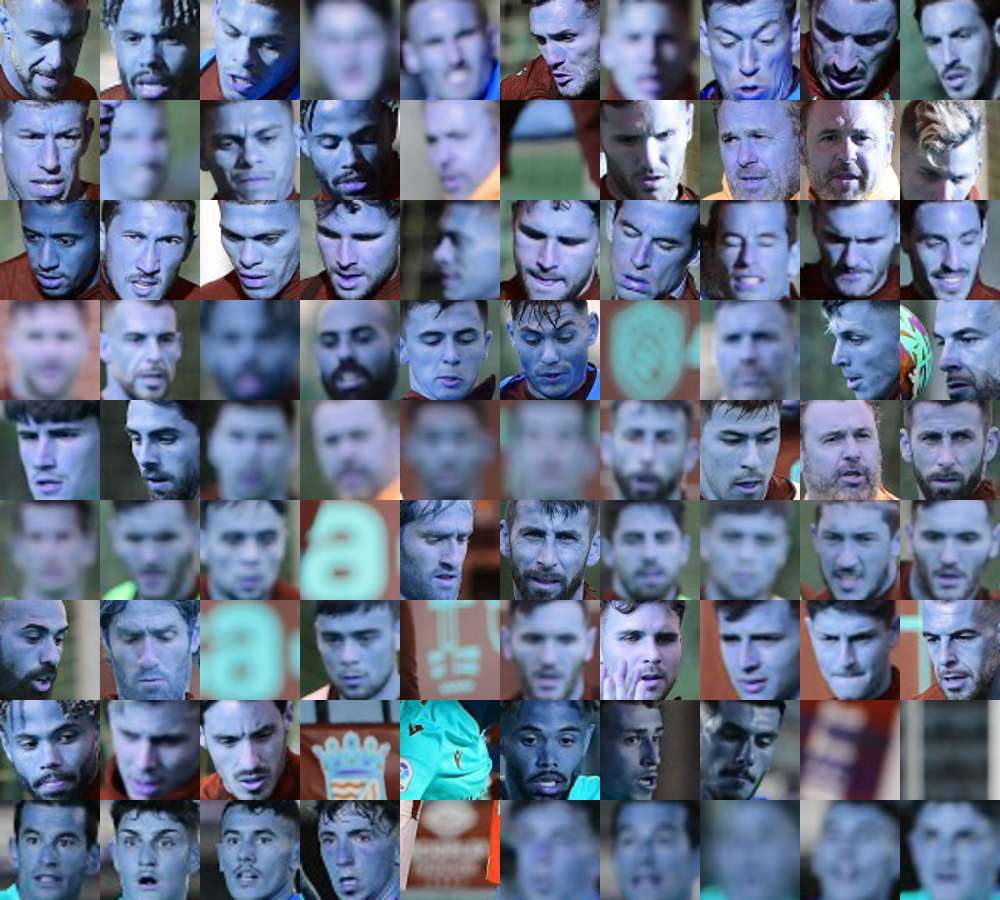

In [15]:
Imagen.crear_collab(images, faces_coords, elementos_h=9, elementos_v=9)